## tuning regularization parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import wobble

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
starname = '51peg'
r = np.arange(30)
#xlim = [4050, 4055]
#xlim = [5940, 5955]
#xlim = [3780, 3795]
#ylim = [0.3, 1.1]
#ylim = [0.2, 2.]
xlim = None
ylim = None

In [3]:
%%time
data = wobble.Data(starname+'_e2ds.hdf5', filepath='data/', orders=r)
model = wobble.Model(data)
model.add_star('star')
model.add_telluric('tellurics', rvs_fixed=True, variable_bases=3)

no regularization amplitudes specified - taking defaults
no regularization amplitudes specified - taking defaults
CPU times: user 19.9 s, sys: 2.82 s, total: 22.8 s
Wall time: 22.8 s


In [4]:
model.components[0].L1_template[0] = 1.e1 # star
model.components[0].L2_template[0] = 1.e3   # star
model.components[1].L1_template[0] = 1.e3 # tellurics
model.components[1].L2_template[0] = 1.e6   # tellurics
model.components[1].L1_basis_vectors[0] = 1.e8
model.components[1].L2_basis_vectors[0] = 1.e12
model.components[1].L2_basis_weights[0] = 1. # by definition

In [5]:
%%time
results = wobble.optimize_order(model, data, 0, niter=50, save_history=False, basename=starname)
#history = wobble.History(model, data, 0, 50, filename=starname+'_o0_history.hdf5')

100%|██████████| 50/50 [00:13<00:00,  3.70it/s]


CPU times: user 2min 18s, sys: 1min 41s, total: 3min 59s
Wall time: 3min 42s


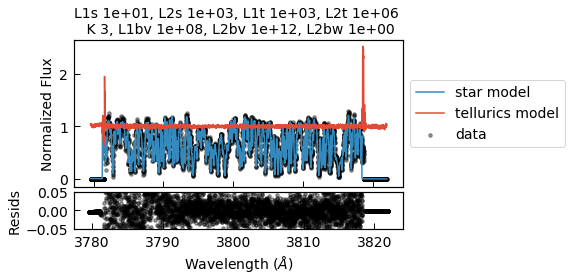

In [6]:
e = 12 # random
fig, (ax, ax2) = plt.subplots(2, 1, gridspec_kw = {'height_ratios':[4, 1]})
ax.plot(np.exp(results.xs[0][e]), np.exp(results.star_ys_predicted[0][e]), label='star model', lw=1.5)
ax.plot(np.exp(results.xs[0][e]), np.exp(results.tellurics_ys_predicted[0][e]), label='tellurics model', lw=1.5)
ax.scatter(np.exp(results.xs[0][e]), np.exp(results.ys[0][e]), marker=".", alpha=0.4, c='k', label='data')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xticklabels([])
ax.set_ylabel('Normalized Flux', fontsize=14)
ax2.scatter(np.exp(results.xs[0][e]), np.exp(results.ys[0][e]) - np.exp(results.ys_predicted[0][e]), marker=".", alpha=0.4, c='k')
ax2.set_xlim(xlim)
ax2.set_ylim([-0.05, 0.05])
ax2.set_xlabel(r'Wavelength ($\AA$)', fontsize=14)
ax2.set_ylabel('Resids', fontsize=14)

# Shrink current axis by 50%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.5, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

ax.set_title('L1s {0:.0e}, L2s {1:.0e}, L1t {2:.0e}, L2t {3:.0e} \n K {4}, L1bv {5:.0e}, L2bv {6:.0e}, L2bw {7:.0e}'.format(
    model.components[0].L1_template[0], model.components[0].L2_template[0],
    model.components[1].L1_template[0], model.components[1].L2_template[0],
    model.components[1].K, model.components[1].L1_basis_vectors[0], 
    model.components[1].L2_basis_vectors[0], model.components[1].L2_basis_weights[0]),
    fontsize=14)
fig.tight_layout()
fig.subplots_adjust(hspace=0.05)
#plt.savefig('regularization/L1s{0:.0e}_L2s{1:.0e}_L1t{2:.0e}_L2t{3:.0e}_K{4}_L1bv{5:.0e}_L2bv{6:.0e}_L2bw{7:.0e}.png'.format(
#    model.components[0].L1_template[0], model.components[0].L2_template[0],
#    model.components[1].L1_template[0], model.components[1].L2_template[0],
#    model.components[1].K, model.components[1].L1_basis_vectors[0], 
#    model.components[1].L2_basis_vectors[0], model.components[1].L2_basis_weights[0]));